In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import wrangle

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', False)

In [3]:
train, validate, test = wrangle.wrangle_zillow()

Shape of Data: 
(52319, 68)
Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52319 entries, 0 to 52318
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            52319 non-null  int64  
 1   parcelid                      52319 non-null  int64  
 2   airconditioningtypeid         13615 non-null  float64
 3   architecturalstyletypeid      70 non-null     float64
 4   basementsqft                  47 non-null     float64
 5   bathroomcnt                   52319 non-null  float64
 6   bedroomcnt                    52319 non-null  float64
 7   buildingclasstypeid           0 non-null      float64
 8   buildingqualitytypeid         33654 non-null  float64
 9   calculatedbathnbr             52184 non-null  float64
 10  decktypeid                    389 non-null    float64
 11  finishedfloor1squarefeet      4371 non-null   float64
 12  calculatedfinishedsquaref

In [4]:
train.head()

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc,id_scaled,parcelid_scaled,bathroomcnt_scaled,calculatedbathnbr_scaled,calculatedfinishedsquarefeet_scaled,finishedsquarefeet12_scaled,latitude_scaled,longitude_scaled,lotsizesquarefeet_scaled,rawcensustractandblock_scaled,regionidcity_scaled,regionidzip_scaled,yearbuilt_scaled,structuretaxvaluedollarcnt_scaled,taxvaluedollarcnt_scaled,landtaxvaluedollarcnt_scaled,taxamount_scaled,censustractandblock_scaled,logerror_scaled
43549,2242446,11887287,5.0,4.0,5.0,4452.0,4452.0,6037.0,5.0,34122603.0,-118137090.0,20654.0,0101,261.0,6.037464e+07,47019.0,3101.0,96294.0,0.0,1977.0,1038503.0,2886017.0,2016.0,1847514.0,32797.69,6.037464e+13,-0.026282,2017-08-08,Single Family Residential,0.751938,0.007490,0.277778,0.235294,0.194200,0.194200,0.531127,0.698444,0.002894,0.004910,0.110740,0.001027,0.722628,0.113301,0.058806,0.037722,0.055825,0.000009,0.410284
6685,362354,11640301,4.0,5.0,4.0,3003.0,3003.0,6037.0,4.0,34097434.0,-118405661.0,16036.0,0101,261.0,6.037701e+07,10389.0,3101.0,96086.0,0.0,1947.0,324677.0,1190485.0,2016.0,865808.0,37271.98,6.037701e+13,0.119647,2017-02-15,Single Family Residential,0.121405,0.005916,0.222222,0.176471,0.127392,0.127392,0.514018,0.558283,0.002232,0.008111,0.017549,0.000342,0.503650,0.035413,0.024245,0.017667,0.063453,0.000014,0.435440
46076,2741162,14389212,3.0,4.0,3.0,2826.0,2826.0,6059.0,3.0,33581407.0,-117692026.0,23650.0,122,261.0,6.059042e+07,25458.0,1286.0,96971.0,8.0,1978.0,211792.0,342514.0,2016.0,130722.0,3475.78,6.059042e+13,0.032420,2017-08-18,Single Family Residential,0.919194,0.023434,0.166667,0.117647,0.119231,0.119231,0.163260,0.930714,0.003324,0.296872,0.055886,0.003257,0.729927,0.023095,0.006961,0.002650,0.005838,0.000519,0.420404
30376,1831326,14090302,2.0,3.0,2.0,1391.0,1391.0,6059.0,2.0,33761014.0,-118040759.0,6630.0,122,261.0,6.059100e+07,34780.0,1286.0,96990.0,6.0,1965.0,84915.0,604000.0,2016.0,519085.0,7179.90,6.059100e+13,0.145673,2017-06-09,Single Family Residential,0.614059,0.021529,0.111111,0.058824,0.053068,0.053068,0.285344,0.748717,0.000882,0.297651,0.079603,0.003319,0.635036,0.009251,0.012291,0.010584,0.012153,0.000520,0.439927
22857,1391795,11702419,1.0,2.0,1.0,1064.0,1064.0,6037.0,1.0,34002389.0,-118312598.0,5199.0,0100,261.0,6.037232e+07,12447.0,3101.0,96043.0,0.0,1909.0,41687.0,112711.0,2016.0,71024.0,1422.45,6.037232e+13,-0.177055,2017-05-09,Single Family Residential,0.466652,0.006312,0.055556,0.000000,0.037992,0.037992,0.449413,0.606850,0.000677,0.001776,0.022785,0.000201,0.226277,0.004535,0.002277,0.001430,0.002338,0.000003,0.384292


In [58]:
# narrow down my features to what I want to explore on
numericals = ['logerror_scaled', 'taxvaluedollarcnt', 'yearbuilt']
categoricals = ['fips']
outlier_cols = ['bathroomcnt', 'bedroomcnt']
explore_cols = numericals + categoricals

In [19]:
filtered_data = train[(train['bathroomcnt'] <= 6) & (train['bedroomcnt'] <= 6)]

In [62]:
for col in numericals:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds based on the IQR
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the data within the bounds
    filtered_data = train[(train[col] >= lower_bound) & (train[col] <= upper_bound)]

In [7]:
train.taxvaluedollarcnt.max()

49061236.0

In [14]:
filtered_data.taxvaluedollarcnt.max()

20203475.0

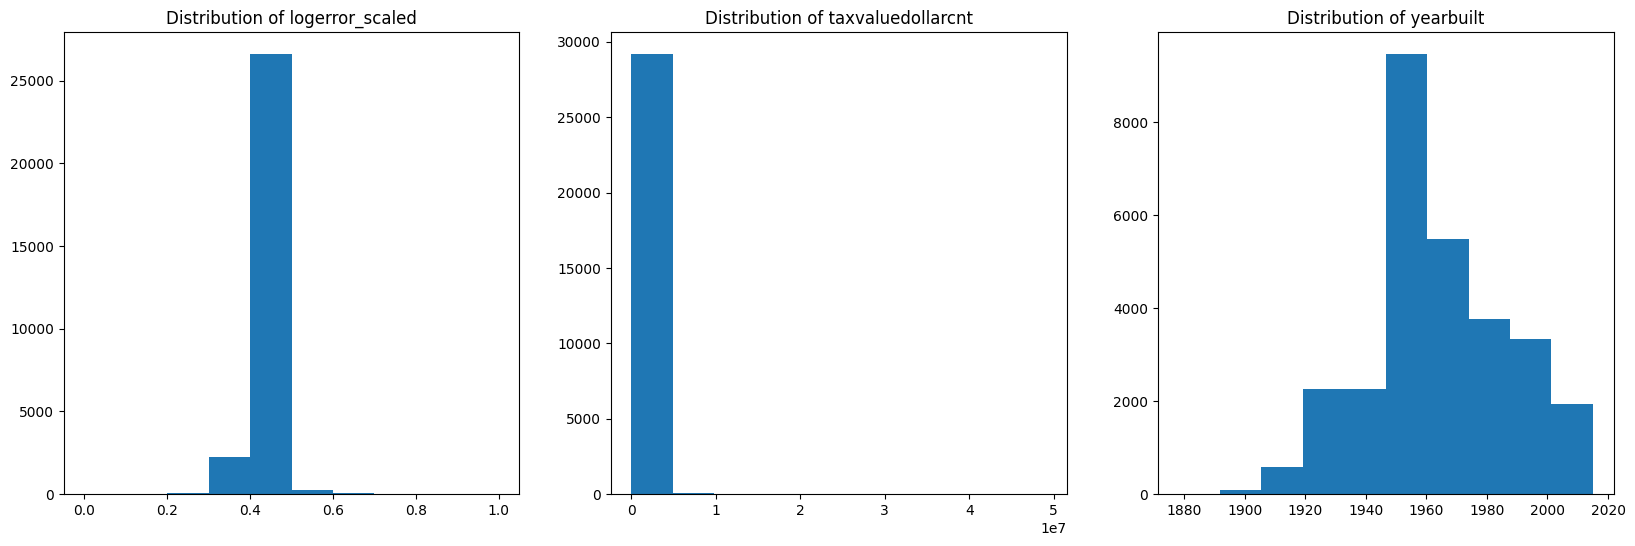

In [59]:
fig, axs = plt.subplots(1,3, figsize=(20,6))
for col, ax in zip(numericals, axs):
    ax.hist(train[col])
    ax.set_title(f'Distribution of {col}')
    

    # Q1 = train[col].quantile(0.25)
    # Q3 = train[col].quantile(0.75)
    # IQR = Q3 - Q1

    # # Define the upper bound based on the IQR
    # upper_bound = Q3 + 20 * IQR

    # ax.set_xlim([0, upper_bound]) 
    
plt.show()

/usr/local/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


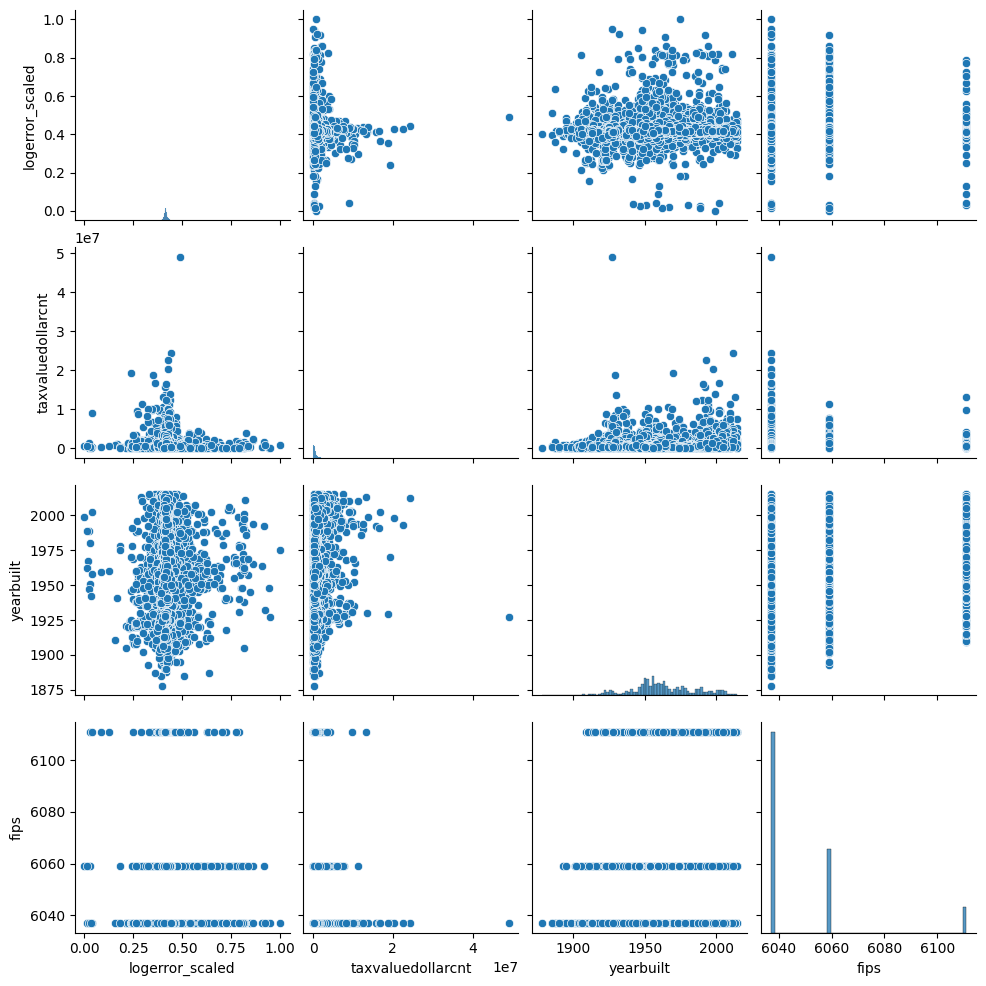

In [63]:
sns.pairplot(data=train[explore_cols])

In [64]:
sns.pairplot(data=filtered_data[explore_cols])